<a href="https://colab.research.google.com/github/Naditya206/PCVK/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt


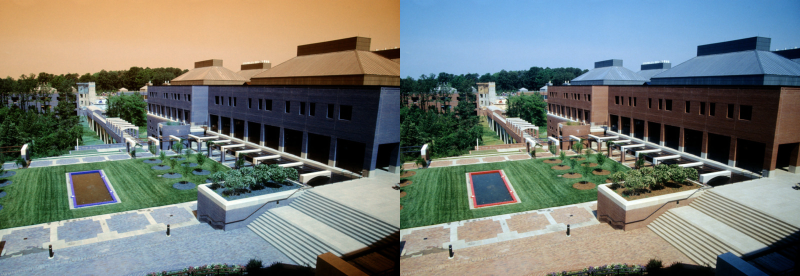

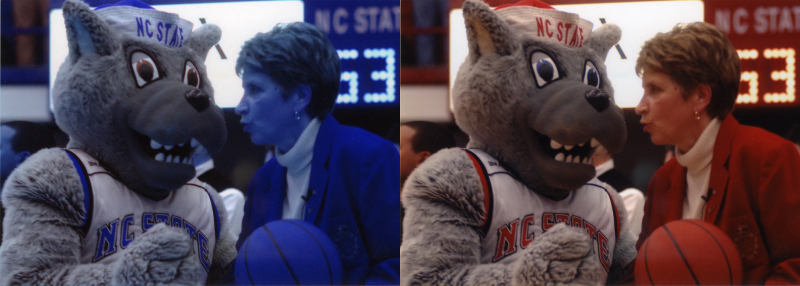

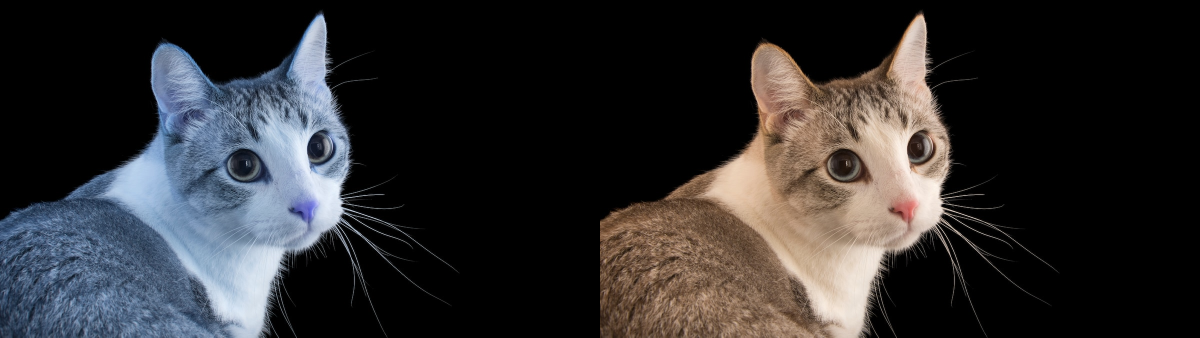

In [20]:
# Membuat list untuk menyimpan url dari beberapa image
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_16x9.jpg?w=1200"]

# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
    image = io.imread(url)                          # read image
    image = cv.resize(image, (0,0), fx=0.5, fy=0.5) # resize image to half size
    image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # convert color to RGB
    final_frame = cv.hconcat([image, image_2])      # concatenate image
    cv2_imshow(final_frame)                         # show image
    print('\n')


resolusi image: tinggi x lebar =  338  x  600


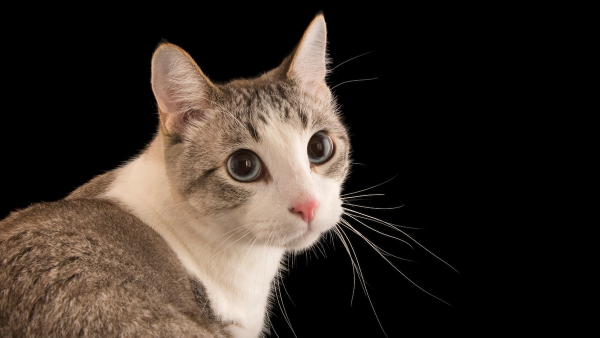

In [21]:
tinggi = image_2.shape[0]
lebar = image_2.shape[1]

print("resolusi image: tinggi x lebar = ", tinggi, " x ", lebar)
cv2_imshow(image_2)


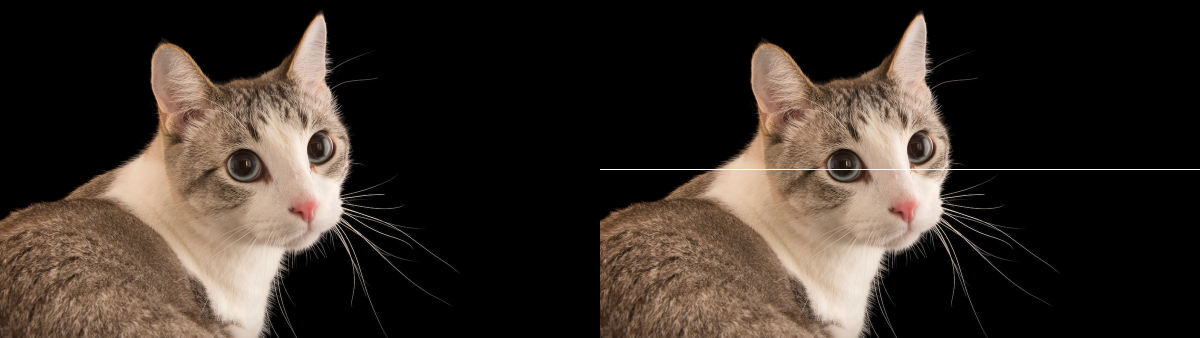

In [22]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# membuat garis horizontal ditengah image
for y in range(lebar):
    image_3[int((tinggi)/2), y] = [255, 255, 255]

final_frame = cv.hconcat([image_2, image_3])
cv2_imshow(final_frame)


**PERTANYAAN PRAKTIKUM D2**

1. Jelaskan, mengapa pada modul praktikum ini eksekusi kode Python dilakukan menggunakan Google Colab?

**Jawaban:**
Google Colab digunakan karena berbasis cloud, gratis, mudah diakses tanpa perlu instalasi Python dan library di komputer lokal. Colab juga menyediakan GPU/TPU gratis untuk komputasi yang lebih cepat, mendukung kolaborasi, serta mempermudah berbagi notebook antar pengguna.

2. Jelaskan mengenai kegunaan setiap library pada praktikum langkah ke delapan? Apakah semua library tersebut harus digunakan dalam praktikum sesi ini?

**Jawaban:**

numpy (np) → manipulasi array dan operasi numerik.

pandas (pd) → pengolahan data tabular (meski di praktikum ini tidak dominan digunakan).

cv2 (cv) → library OpenCV untuk pemrosesan gambar.

google.colab.patches.cv2_imshow → menampilkan gambar di Google Colab.

skimage.io → membaca gambar dari file/URL.

skimage.transform → transformasi gambar (resize, rotasi, dsb).

PIL.Image → manipulasi gambar sederhana (membuka, menyimpan, mengonversi format).

matplotlib.pylab (plt) → visualisasi data dan menampilkan gambar.

Tidak semua library harus digunakan dalam satu sesi; beberapa hanya dipersiapkan sebagai alternatif atau pendukung.

3. Pada uji coba langkah ke-9 terdapat potongan kode program sebagai berikut:
image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
Apa kegunaan kode program tersebut? dan apa pengaruhnya jika tidak dilakukan?

**Jawaban:**
Kode tersebut digunakan untuk mengubah ukuran gambar menjadi setengah dari ukuran aslinya (fx=0.5, fy=0.5 artinya skala 50%).
Jika tidak dilakukan, gambar tetap ditampilkan dalam ukuran penuh sehingga dapat membuat pemrosesan lebih lambat dan tampilan lebih besar dari yang diperlukan.

4. Perhatikan potongan kode program berikut:
for y in range(lebar):
    image_3[int((tinggi)/2), y] = [255,255,255]
Apakah kegunaan kode [255,255,255]? Jelaskan!

**Jawaban:**
Kode [255,255,255] merepresentasikan warna putih dalam format RGB.
Potongan kode tersebut digunakan untuk mengganti nilai pixel pada posisi baris tengah gambar dengan warna putih, sehingga terbentuk garis horizontal berwarna putih di tengah gambar.

5. Jelaskan keterkaitan antara pixel dan juga resolusi gambar yang tinggi ataupun rendah!

**Jawaban:**
Pixel adalah unit terkecil penyusun gambar digital. Resolusi menunjukkan jumlah pixel dalam lebar × tinggi gambar.

Resolusi tinggi = lebih banyak pixel → detail gambar lebih jelas, kualitas lebih baik, ukuran file lebih besar.

Resolusi rendah = jumlah pixel lebih sedikit → detail berkurang, gambar tampak buram atau pecah jika diperbesar, ukuran file lebih kecil.

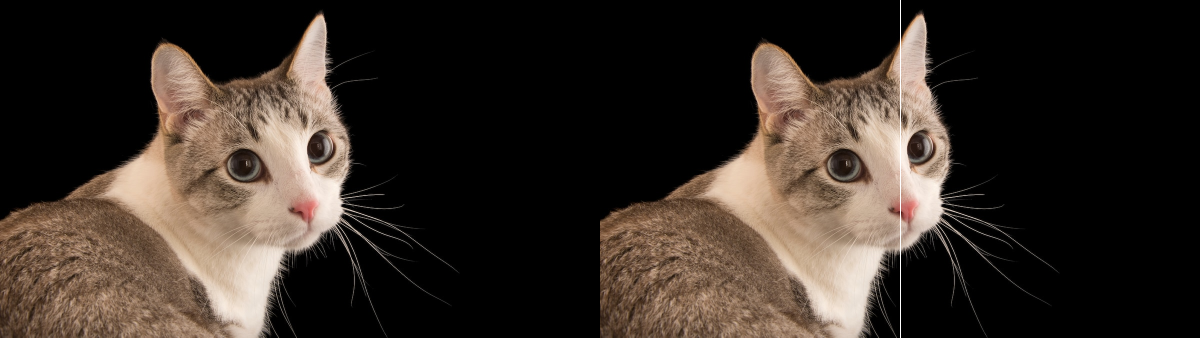

In [26]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# membuat garis vertikal di tengah
for x in range(tinggi):
    image_3[x, int(lebar/2)] = [255, 255, 255]

# gabungkan hasil
final_frame = cv.hconcat([image_2, image_3])
cv2_imshow(final_frame)


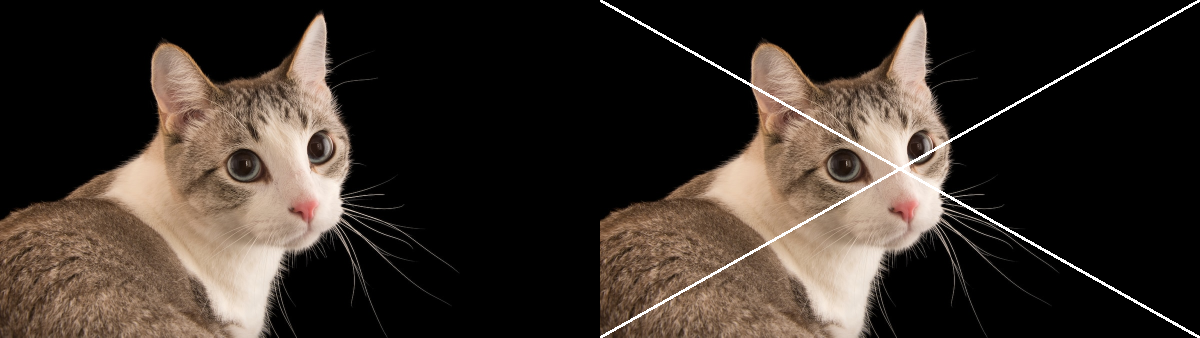

In [30]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# buat garis X (menyilang)
cv.line(image_3, (0, 0), (lebar-1, tinggi-1), (255, 255, 255), 2)
cv.line(image_3, (lebar-1, 0), (0, tinggi-1), (255, 255, 255), 2)

# gabungkan hasil
final_frame = cv.hconcat([image_2, image_3])
cv2_imshow(final_frame)


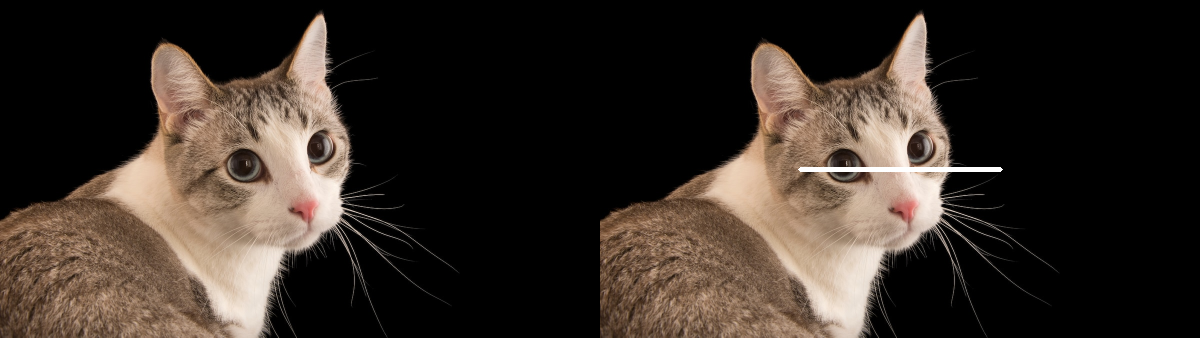

In [31]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# koordinat tengah
y_tengah = tinggi // 2
x_tengah = lebar // 2

# panjang garis (misal 200 piksel)
panjang = 200
x1 = x_tengah - panjang // 2
x2 = x_tengah + panjang // 2

# buat garis horizontal putih di tengah
cv.line(image_3, (x1, y_tengah), (x2, y_tengah), (255, 255, 255), 3)

# gabungkan hasil
final_frame = cv.hconcat([image_2, image_3])
cv2_imshow(final_frame)


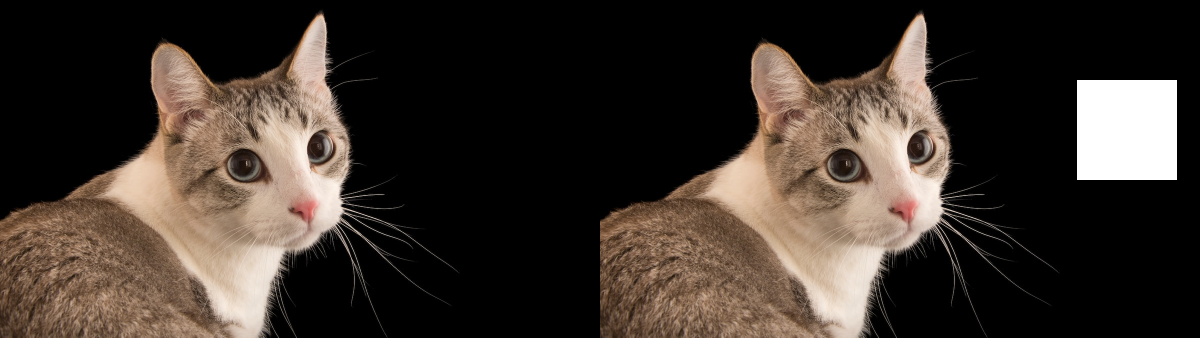

In [33]:
import random

image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# ukuran kotak
kotak_lebar = 100
kotak_tinggi = 100

# posisi acak (biar kotaknya selalu muat dalam gambar)
x_awal = random.randint(0, lebar - kotak_lebar - 1)
y_awal = random.randint(0, tinggi - kotak_tinggi - 1)

# isi kotak dengan putih (255,255,255)
image_3[y_awal:y_awal+kotak_tinggi, x_awal:x_awal+kotak_lebar] = [255, 255, 255]

# gabungkan hasil
final_frame = cv.hconcat([image_2, image_3])
cv2_imshow(final_frame)
